## Tasks:

#### 1.	What was the best month for sales? How much was earned that month?
#### 2.	What city sold the most product?
#### 3.	What time should we display advertisemens to maximize the likelihood of customer’s buying product?
#### 4.	What products are most often sold together?
#### 5.	What product sold the most? Why do you think it sold the most?

In [1]:
# Importing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set_style("white")

import matplotlib as mpl
plt.style.use("science") #"ggplot"

mpl.rc('axes', labelsize=16)
mpl.rc('xtick', labelsize=14)
mpl.rc('ytick', labelsize=14)
mpl.rc('figure', figsize = (8,6))

import warnings
warnings.filterwarnings('ignore')

%config Completer.use_jedi = False

In [ ]:
# working with directories
import os

In [ ]:
relative_path = "./Sales_Data"
os.listdir(relative_path)

### Sub-task: Merge 12 month sales data  into one csv file

In [ ]:
files = [file for file in os.listdir(relative_path) ]
files

In [ ]:
# Concat all the csv file
year_data = pd.DataFrame()
relative_path = "./Sales_Data"
for file in files:
    df = pd.read_csv(relative_path + "/" + file)
    year_data = pd.concat([year_data, df], axis= "rows")

year_data.to_csv("Year-data.csv", index = False)

### Read sales data (after merging)

In [2]:
# Read year data
df_raw = pd.read_csv("Year-data.csv")
# df_raw.head()

In [3]:
# Create a backup for raw df
df = df_raw.copy()

In [4]:
# df.info()
# df.describe(include = "object")
# df.columns

## Task 1: What was the best month for sales? How much was earned that month?

In [5]:
df.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


In [6]:
# Create month columns
df["Month"] = df["Order Date"].str[0:2]

In [7]:
df.dropna(inplace = True)

In [8]:
# Deal "or" in months
cond_or = (df["Month"] != "Or")
df = df[cond_or]

In [9]:
# Convert month in str to month in int
df["Month"] = df["Month"].astype("int32")

### Calculate sales

In [10]:
df["Quantity Ordered"] = pd.to_numeric(df["Quantity Ordered"])
df["Price Each"] = pd.to_numeric(df["Price Each"])

In [11]:
df["Sales"] = df["Quantity Ordered"] * df["Price Each"]

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  object 
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  int64  
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
 6   Month             185950 non-null  int32  
 7   Sales             185950 non-null  float64
dtypes: float64(2), int32(1), int64(1), object(4)
memory usage: 12.1+ MB


In [13]:
sales_by_month = df.groupby(by = "Month").sum()

In [14]:
sales_by_month.reset_index(inplace=True)

In [15]:
print("The best month for sales is: {}".format((sales_by_month["Sales"].argmax() + 1)))
print("Sales of 12 is: {} USD".format(sales_by_month["Sales"].max()))

The best month for sales is: 12
Sales of 12 is: 4613443.34 USD


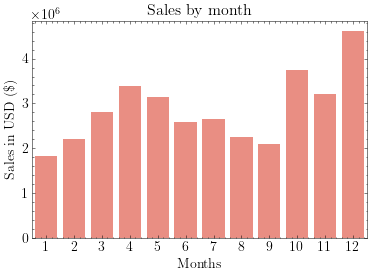

In [16]:
x = sales_by_month["Month"]
y = sales_by_month["Sales"]

plt.figure(figsize = (6,4))

sns.barplot(x, y, color = "salmon")

plt.title("Sales by month", fontsize = 16)
plt.xlabel("Months", fontsize = 14)
plt.ylabel("Sales in USD (\$)", fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

### Task 2: What city sale the most products?

In [17]:
def getCity(address):
    return address.split(",")[1].strip()

In [18]:
df["City"] = df["Purchase Address"].apply(getCity)

In [19]:
sales_by_city = df.groupby(by = "City").sum()

In [20]:
sales_by_city

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta,16602,2779908.20,104794,2795498.58
Austin,11153,1809873.61,69829,1819581.75
Boston,22528,3637409.77,141112,3661642.01
Dallas,16730,2752627.82,104620,2767975.40
Los Angeles,33289,5421435.23,208325,5452570.80
New York City,27932,4635370.83,175741,4664317.43
Portland,14053,2307747.47,87765,2320490.61
San Francisco,50239,8211461.74,315520,8262203.91
Seattle,16553,2733296.01,104941,2747755.48


In [21]:
cities = ['Atlanta', 'Austin', 'Boston', 'Dallas', 'Los Angeles', 'New York City',
       'Portland', 'San Francisco', 'Seattle']

In [22]:
indexCity = sales_by_city["Sales"].argmax()
print("The city with the highest sale is: {}".format(cities[indexCity]))

The city with the highest sale is: San Francisco


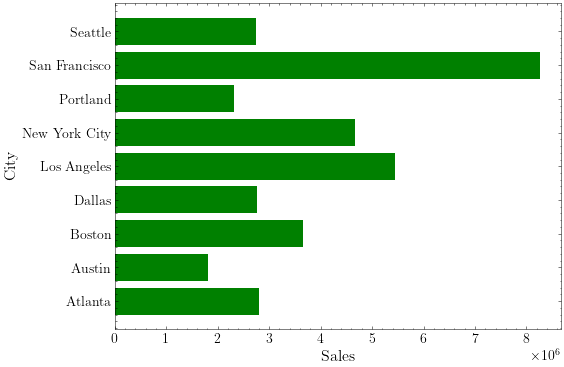

In [28]:
# Define x,y axes
x = sales_by_city.index
y = sales_by_city["Sales"]

#plot
plt.barh(x, y, color = "green")

#set title, label
plt.xticks()
plt.xlabel("Sales")
plt.ylabel("City")
#show plot
plt.show()

## 3. What time should we display advertisemens to maximize the likelihood of customer’s buying product?


In [31]:
df["Hour"] = pd.to_datetime(df["Order Date"]).dt.hour

In [44]:
groupedByHourSum = df.groupby(by = "Hour").sum()

In [36]:
groupedByHour = df.groupby(by = "Hour").count()

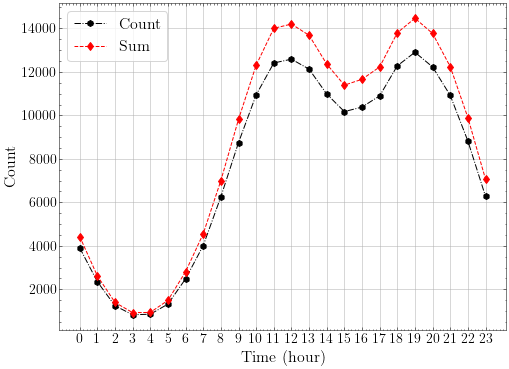

In [57]:
# Drawing count order by hour

x = groupedByHour.index
y = groupedByHour["Quantity Ordered"]
z = groupedByHourSum["Quantity Ordered"]

fig, ax= plt.subplots()

ax.plot(x, y, "kh-.", label = "Count")
ax.plot(x, z, "rd--", label = "Sum")


plt.xlabel("Time (hour)")
plt.ylabel("Count")

plt.xticks(x)

plt.legend(loc = 2, fontsize = 16, frameon=True)
plt.grid()
plt.show()

## 4. What products are most often sold together?

In [60]:
condDuplicatedID = df["Order ID"].duplicated(keep = False)

In [64]:
duplicated_df = df[condDuplicatedID]

In [78]:
duplicated_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14649 entries, 16 to 186843
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order ID          14649 non-null  object 
 1   Product           14649 non-null  object 
 2   Quantity Ordered  14649 non-null  int64  
 3   Price Each        14649 non-null  float64
 4   Order Date        14649 non-null  object 
 5   Purchase Address  14649 non-null  object 
 6   Month             14649 non-null  int32  
 7   Sales             14649 non-null  float64
 8   City              14649 non-null  object 
 9   Hour              14649 non-null  int64  
dtypes: float64(2), int32(1), int64(2), object(5)
memory usage: 1.2+ MB


In [63]:
# Create a function to join product with same Order ID
def connectProduct(product):
    return ", ".join(product)

In [79]:
duplicated_df["Grouped Products"] = duplicated_df.groupby("Order ID")["Product"].transform(connectProduct)

In [82]:
duplicated_df[["Order ID", "Product", "Grouped Products"]]

,Order ID,Product,Grouped Products
16,295681,Google Phone,"Google Phone, USB-C Charging Cable, Bose Sound..."
17,295681,USB-C Charging Cable,"Google Phone, USB-C Charging Cable, Bose Sound..."
18,295681,Bose SoundSport Headphones,"Google Phone, USB-C Charging Cable, Bose Sound..."
19,295681,Wired Headphones,"Google Phone, USB-C Charging Cable, Bose Sound..."
36,295698,Vareebadd Phone,"Vareebadd Phone, USB-C Charging Cable"
...,...,...,...
186820,222882,AA Batteries (4-pack),"Apple Airpods Headphones, AA Batteries (4-pack)"
186822,222884,Google Phone,"Google Phone, USB-C Charging Cable"
186823,222884,USB-C Charging Cable,"Google Phone, USB-C Charging Cable"
186842,222903,iPhone,"iPhone, Lightning Charging Cable"


In [88]:
duplicated_index = duplicated_df["Order ID"].drop_duplicates().index

In [99]:
groupedProducts = duplicated_df.loc[duplicated_index, "Grouped Products"]

In [100]:
groupedProducts.value_counts()

iPhone, Lightning Charging Cable                              882
Google Phone, USB-C Charging Cable                            856
iPhone, Wired Headphones                                      361
Vareebadd Phone, USB-C Charging Cable                         312
Google Phone, Wired Headphones                                303
                                                             ... 
20in Monitor, iPhone                                            1
Google Phone, USB-C Charging Cable, Vareebadd Phone             1
LG Dryer, Google Phone                                          1
20in Monitor, LG Washing Machine                                1
Google Phone, Bose SoundSport Headphones, 27in FHD Monitor      1
Name: Grouped Products, Length: 366, dtype: int64

In [113]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in groupedProducts:
    row_list = row.split(", ")
    count.update(Counter(combinations(row_list, 2)))

for key, value in count.most_common(5):
    print(f"{key[0]} and {key[1]} have {value} times soled together")

iPhone and Lightning Charging Cable have 1005 times soled together
Google Phone and USB-C Charging Cable have 987 times soled together
iPhone and Wired Headphones have 447 times soled together
Google Phone and Wired Headphones have 414 times soled together
Vareebadd Phone and USB-C Charging Cable have 361 times soled together


## 5. What product sold the most? Why do you think it sold the most?

In [117]:
groupedByProduct = df.groupby("Product").sum()

In [134]:
groupedByProduct

,Quantity Ordered,Price Each,Month,Sales,Hour
Product,,,,,
20in Monitor,4129,451068.99,29336,454148.71,58764
27in 4K Gaming Monitor,6244,2429637.70,44440,2435097.56,90916
27in FHD Monitor,7550,1125974.93,52558,1132424.50,107540
34in Ultrawide Monitor,6199,2348718.19,43304,2355558.01,89076
AA Batteries (4-pack),27635,79015.68,145558,106118.40,298342
AAA Batteries (4-pack),31017,61716.59,146370,92740.83,297332
Apple Airpods Headphones,15661,2332350.00,109477,2349150.00,223304
Bose SoundSport Headphones,13457,1332366.75,94113,1345565.43,192445
Flatscreen TV,4819,1440000.00,34224,1445700.00,68815


In [130]:
groupedByProductMinPrice = df.groupby("Product").min()

In [133]:
groupedByProductMinPrice

,Order ID,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
Product,,,,,,,,,
20in Monitor,141289,1,109.99,01/01/19 12:50,"1 Dogwood St, Dallas, TX 75001",1,109.99,Atlanta,0
27in 4K Gaming Monitor,141240,1,389.99,01/01/19 10:02,"1 4th St, Boston, MA 02215",1,389.99,Atlanta,0
27in FHD Monitor,141237,1,149.99,01/01/19 09:08,"1 7th St, Los Angeles, CA 90001",1,149.99,Atlanta,0
34in Ultrawide Monitor,141311,1,379.99,01/01/19 07:24,"1 9th St, Dallas, TX 75001",1,379.99,Atlanta,0
AA Batteries (4-pack),141253,1,3.84,01/01/19 07:26,"1 14th St, San Francisco, CA 94016",1,3.84,Atlanta,0
AAA Batteries (4-pack),141239,1,2.99,01/01/19 05:53,"1 4th St, Dallas, TX 75001",1,2.99,Atlanta,0
Apple Airpods Headphones,141243,1,150.00,01/01/19 04:56,"1 12th St, Los Angeles, CA 90001",1,150.00,Atlanta,0
Bose SoundSport Headphones,141242,1,99.99,01/01/19 09:12,"1 14th St, New York City, NY 10001",1,99.99,Atlanta,0
Flatscreen TV,141248,1,300.00,01/01/19 09:58,"1 4th St, Atlanta, GA 30301",1,300.00,Atlanta,0


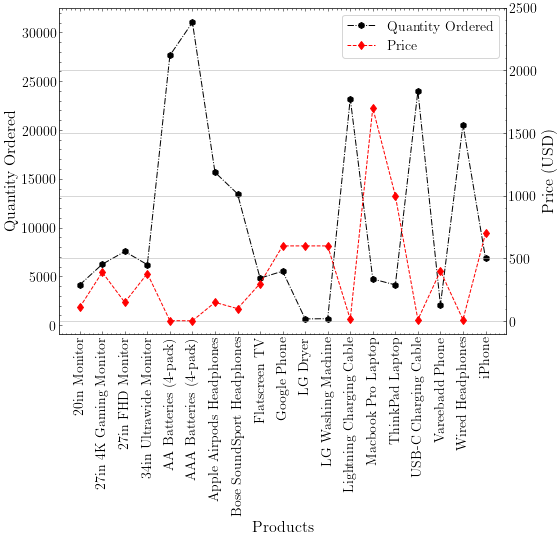

In [157]:
x = groupedByProduct.index

# Drawing count order by hour

x = groupedByProduct.index
y = groupedByProduct["Quantity Ordered"]
z = groupedByProductMinPrice["Price Each"]

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

lns1 = ax1.plot(x, y, "kh-.", label = "Quantity Ordered")
lns2 = ax2.plot(x, z, "rd--", label = "Price")


ax1.set_xlabel("Products")
ax1.set_ylabel("Quantity Ordered")
ax2.set_ylabel("Price (USD)")

ax1.set_xticklabels(x, rotation = 90)

lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=0, frameon = True, fontsize = 14)

ax2.set_ylim([-100,2500])
plt.grid()
plt.show()